## 4(3) LGBM&CAT
221103일 학습시킨 모델의 코드이다. 최종적으로 LGBM을 택했으며 3.2693982693이 나왔다.
- target encoding으로 과적합이 된 것 같다.

### Import

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings ; warnings.filterwarnings('ignore')

### Read Data

In [2]:
train = pd.read_csv('../data/feature/20221103_train_2.csv', dtype={'maximum_speed_limit':int, 'weight_restricted':int})
test = pd.read_csv('../data/feature/20221103_test_2.csv', dtype={'maximum_speed_limit':int, 'weight_restricted':int})

In [3]:
weather_train = pd.read_parquet('../data/clean/weather_train.parquet')

In [5]:
train = pd.merge(train, weather_train, on='id')

In [7]:
# Feature가 아닌 변수를 제거한다.
train_id, test_id = train['id'], test['id'] ; del train['id'], test['id']

# X_train, y_train, X_test를 지정한다
y_train = train['target'] ; del train['target']
X_train, X_test = train, test
print('X_train.shape:', X_train.shape, 'X_test.shape', X_test.shape)

X_train.shape: (4700214, 60) X_test.shape (291241, 49)


### Split Data

In [8]:
train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2, shuffle=False, random_state=2022)

### $\blacktriangleright$ LGBM

In [9]:
lgbm_reg = LGBMRegressor(n_estimators=10000, metric= 'mae', random_state = 2022)

In [10]:
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'mae', 
            "eval_set" : [(val_X, val_y)],
            'verbose': 1,
            'categorical_feature': ['day_of_week', 'connect_code', 'maximum_speed_limit',
                                    'weight_restricted', 'road_type', 'start_turn_restricted', 'end_turn_restricted']}

In [11]:
lgbm_reg.fit(train_X, train_y, **fit_params)

[1]	valid_0's l1: 12.0959
[2]	valid_0's l1: 11.08
[3]	valid_0's l1: 10.1828
[4]	valid_0's l1: 9.389
[5]	valid_0's l1: 8.68589
[6]	valid_0's l1: 8.06999
[7]	valid_0's l1: 7.52853
[8]	valid_0's l1: 7.05083
[9]	valid_0's l1: 6.63784
[10]	valid_0's l1: 6.27953
[11]	valid_0's l1: 5.96735
[12]	valid_0's l1: 5.69651
[13]	valid_0's l1: 5.46361
[14]	valid_0's l1: 5.26231
[15]	valid_0's l1: 5.09161
[16]	valid_0's l1: 4.94269
[17]	valid_0's l1: 4.8155
[18]	valid_0's l1: 4.7065
[19]	valid_0's l1: 4.61203
[20]	valid_0's l1: 4.53203
[21]	valid_0's l1: 4.46204
[22]	valid_0's l1: 4.40147
[23]	valid_0's l1: 4.34903
[24]	valid_0's l1: 4.30429
[25]	valid_0's l1: 4.26492
[26]	valid_0's l1: 4.23063
[27]	valid_0's l1: 4.20152
[28]	valid_0's l1: 4.17501
[29]	valid_0's l1: 4.15031
[30]	valid_0's l1: 4.12855
[31]	valid_0's l1: 4.11037
[32]	valid_0's l1: 4.09394
[33]	valid_0's l1: 4.0789
[34]	valid_0's l1: 4.06611
[35]	valid_0's l1: 4.05425
[36]	valid_0's l1: 4.04159
[37]	valid_0's l1: 4.02865
[38]	valid_0's l1

[300]	valid_0's l1: 3.56517
[301]	valid_0's l1: 3.56482
[302]	valid_0's l1: 3.56382
[303]	valid_0's l1: 3.56361
[304]	valid_0's l1: 3.56295
[305]	valid_0's l1: 3.56244
[306]	valid_0's l1: 3.56184
[307]	valid_0's l1: 3.56028
[308]	valid_0's l1: 3.55968
[309]	valid_0's l1: 3.55903
[310]	valid_0's l1: 3.55871
[311]	valid_0's l1: 3.5585
[312]	valid_0's l1: 3.55731
[313]	valid_0's l1: 3.55654
[314]	valid_0's l1: 3.55619
[315]	valid_0's l1: 3.55492
[316]	valid_0's l1: 3.55328
[317]	valid_0's l1: 3.55177
[318]	valid_0's l1: 3.55147
[319]	valid_0's l1: 3.55038
[320]	valid_0's l1: 3.54948
[321]	valid_0's l1: 3.549
[322]	valid_0's l1: 3.54844
[323]	valid_0's l1: 3.54796
[324]	valid_0's l1: 3.54757
[325]	valid_0's l1: 3.5474
[326]	valid_0's l1: 3.54726
[327]	valid_0's l1: 3.54638
[328]	valid_0's l1: 3.54579
[329]	valid_0's l1: 3.54493
[330]	valid_0's l1: 3.54372
[331]	valid_0's l1: 3.54316
[332]	valid_0's l1: 3.54247
[333]	valid_0's l1: 3.54146
[334]	valid_0's l1: 3.54114
[335]	valid_0's l1: 3.53

[597]	valid_0's l1: 3.39963
[598]	valid_0's l1: 3.39922
[599]	valid_0's l1: 3.39889
[600]	valid_0's l1: 3.39873
[601]	valid_0's l1: 3.39786
[602]	valid_0's l1: 3.39726
[603]	valid_0's l1: 3.39715
[604]	valid_0's l1: 3.39713
[605]	valid_0's l1: 3.39673
[606]	valid_0's l1: 3.39621
[607]	valid_0's l1: 3.39606
[608]	valid_0's l1: 3.39596
[609]	valid_0's l1: 3.39546
[610]	valid_0's l1: 3.39514
[611]	valid_0's l1: 3.39496
[612]	valid_0's l1: 3.39483
[613]	valid_0's l1: 3.39469
[614]	valid_0's l1: 3.39295
[615]	valid_0's l1: 3.3929
[616]	valid_0's l1: 3.39274
[617]	valid_0's l1: 3.39256
[618]	valid_0's l1: 3.39251
[619]	valid_0's l1: 3.39166
[620]	valid_0's l1: 3.39154
[621]	valid_0's l1: 3.39133
[622]	valid_0's l1: 3.39108
[623]	valid_0's l1: 3.39095
[624]	valid_0's l1: 3.38993
[625]	valid_0's l1: 3.38963
[626]	valid_0's l1: 3.38936
[627]	valid_0's l1: 3.38901
[628]	valid_0's l1: 3.38745
[629]	valid_0's l1: 3.38646
[630]	valid_0's l1: 3.3863
[631]	valid_0's l1: 3.38559
[632]	valid_0's l1: 3.

[896]	valid_0's l1: 3.31932
[897]	valid_0's l1: 3.31916
[898]	valid_0's l1: 3.31894
[899]	valid_0's l1: 3.31863
[900]	valid_0's l1: 3.31838
[901]	valid_0's l1: 3.31832
[902]	valid_0's l1: 3.31826
[903]	valid_0's l1: 3.31813
[904]	valid_0's l1: 3.31784
[905]	valid_0's l1: 3.31766
[906]	valid_0's l1: 3.31735
[907]	valid_0's l1: 3.31678
[908]	valid_0's l1: 3.31672
[909]	valid_0's l1: 3.31659
[910]	valid_0's l1: 3.31596
[911]	valid_0's l1: 3.31591
[912]	valid_0's l1: 3.31555
[913]	valid_0's l1: 3.31514
[914]	valid_0's l1: 3.31491
[915]	valid_0's l1: 3.31462
[916]	valid_0's l1: 3.31442
[917]	valid_0's l1: 3.31397
[918]	valid_0's l1: 3.31371
[919]	valid_0's l1: 3.31366
[920]	valid_0's l1: 3.31349
[921]	valid_0's l1: 3.31347
[922]	valid_0's l1: 3.31314
[923]	valid_0's l1: 3.31311
[924]	valid_0's l1: 3.3129
[925]	valid_0's l1: 3.31287
[926]	valid_0's l1: 3.31264
[927]	valid_0's l1: 3.31261
[928]	valid_0's l1: 3.31218
[929]	valid_0's l1: 3.31143
[930]	valid_0's l1: 3.31125
[931]	valid_0's l1: 3

[1186]	valid_0's l1: 3.25777
[1187]	valid_0's l1: 3.2577
[1188]	valid_0's l1: 3.25763
[1189]	valid_0's l1: 3.25745
[1190]	valid_0's l1: 3.2574
[1191]	valid_0's l1: 3.2572
[1192]	valid_0's l1: 3.25694
[1193]	valid_0's l1: 3.25681
[1194]	valid_0's l1: 3.25672
[1195]	valid_0's l1: 3.25666
[1196]	valid_0's l1: 3.25663
[1197]	valid_0's l1: 3.25659
[1198]	valid_0's l1: 3.25653
[1199]	valid_0's l1: 3.25631
[1200]	valid_0's l1: 3.25606
[1201]	valid_0's l1: 3.25583
[1202]	valid_0's l1: 3.25555
[1203]	valid_0's l1: 3.25538
[1204]	valid_0's l1: 3.25436
[1205]	valid_0's l1: 3.25392
[1206]	valid_0's l1: 3.2539
[1207]	valid_0's l1: 3.25362
[1208]	valid_0's l1: 3.25341
[1209]	valid_0's l1: 3.25302
[1210]	valid_0's l1: 3.25296
[1211]	valid_0's l1: 3.25262
[1212]	valid_0's l1: 3.25248
[1213]	valid_0's l1: 3.2524
[1214]	valid_0's l1: 3.25219
[1215]	valid_0's l1: 3.25188
[1216]	valid_0's l1: 3.25152
[1217]	valid_0's l1: 3.25148
[1218]	valid_0's l1: 3.25144
[1219]	valid_0's l1: 3.25138
[1220]	valid_0's l1

[1474]	valid_0's l1: 3.21683
[1475]	valid_0's l1: 3.21661
[1476]	valid_0's l1: 3.21661
[1477]	valid_0's l1: 3.21648
[1478]	valid_0's l1: 3.21646
[1479]	valid_0's l1: 3.21641
[1480]	valid_0's l1: 3.21638
[1481]	valid_0's l1: 3.21634
[1482]	valid_0's l1: 3.21634
[1483]	valid_0's l1: 3.21621
[1484]	valid_0's l1: 3.21614
[1485]	valid_0's l1: 3.21611
[1486]	valid_0's l1: 3.21603
[1487]	valid_0's l1: 3.216
[1488]	valid_0's l1: 3.21597
[1489]	valid_0's l1: 3.21596
[1490]	valid_0's l1: 3.21579
[1491]	valid_0's l1: 3.2157
[1492]	valid_0's l1: 3.21563
[1493]	valid_0's l1: 3.2156
[1494]	valid_0's l1: 3.21551
[1495]	valid_0's l1: 3.21544
[1496]	valid_0's l1: 3.21536
[1497]	valid_0's l1: 3.21524
[1498]	valid_0's l1: 3.21518
[1499]	valid_0's l1: 3.21514
[1500]	valid_0's l1: 3.21509
[1501]	valid_0's l1: 3.21479
[1502]	valid_0's l1: 3.21458
[1503]	valid_0's l1: 3.21454
[1504]	valid_0's l1: 3.21451
[1505]	valid_0's l1: 3.21448
[1506]	valid_0's l1: 3.21445
[1507]	valid_0's l1: 3.21441
[1508]	valid_0's l

[1759]	valid_0's l1: 3.18856
[1760]	valid_0's l1: 3.18849
[1761]	valid_0's l1: 3.18847
[1762]	valid_0's l1: 3.18838
[1763]	valid_0's l1: 3.18827
[1764]	valid_0's l1: 3.1882
[1765]	valid_0's l1: 3.18792
[1766]	valid_0's l1: 3.1879
[1767]	valid_0's l1: 3.18786
[1768]	valid_0's l1: 3.1878
[1769]	valid_0's l1: 3.18775
[1770]	valid_0's l1: 3.18767
[1771]	valid_0's l1: 3.18763
[1772]	valid_0's l1: 3.18752
[1773]	valid_0's l1: 3.18744
[1774]	valid_0's l1: 3.18737
[1775]	valid_0's l1: 3.18723
[1776]	valid_0's l1: 3.18718
[1777]	valid_0's l1: 3.18713
[1778]	valid_0's l1: 3.18702
[1779]	valid_0's l1: 3.18684
[1780]	valid_0's l1: 3.18679
[1781]	valid_0's l1: 3.18676
[1782]	valid_0's l1: 3.18669
[1783]	valid_0's l1: 3.18642
[1784]	valid_0's l1: 3.18639
[1785]	valid_0's l1: 3.18639
[1786]	valid_0's l1: 3.18637
[1787]	valid_0's l1: 3.18635
[1788]	valid_0's l1: 3.18622
[1789]	valid_0's l1: 3.18621
[1790]	valid_0's l1: 3.18606
[1791]	valid_0's l1: 3.18591
[1792]	valid_0's l1: 3.18581
[1793]	valid_0's 

[2048]	valid_0's l1: 3.16518
[2049]	valid_0's l1: 3.16512
[2050]	valid_0's l1: 3.16506
[2051]	valid_0's l1: 3.16503
[2052]	valid_0's l1: 3.16502
[2053]	valid_0's l1: 3.16493
[2054]	valid_0's l1: 3.16483
[2055]	valid_0's l1: 3.1648
[2056]	valid_0's l1: 3.16477
[2057]	valid_0's l1: 3.16474
[2058]	valid_0's l1: 3.16469
[2059]	valid_0's l1: 3.1646
[2060]	valid_0's l1: 3.16453
[2061]	valid_0's l1: 3.16451
[2062]	valid_0's l1: 3.16447
[2063]	valid_0's l1: 3.16444
[2064]	valid_0's l1: 3.16411
[2065]	valid_0's l1: 3.16391
[2066]	valid_0's l1: 3.16379
[2067]	valid_0's l1: 3.16365
[2068]	valid_0's l1: 3.16349
[2069]	valid_0's l1: 3.16342
[2070]	valid_0's l1: 3.16339
[2071]	valid_0's l1: 3.16312
[2072]	valid_0's l1: 3.16309
[2073]	valid_0's l1: 3.16292
[2074]	valid_0's l1: 3.16264
[2075]	valid_0's l1: 3.16261
[2076]	valid_0's l1: 3.16257
[2077]	valid_0's l1: 3.16254
[2078]	valid_0's l1: 3.16229
[2079]	valid_0's l1: 3.16223
[2080]	valid_0's l1: 3.16213
[2081]	valid_0's l1: 3.16196
[2082]	valid_0's

[2336]	valid_0's l1: 3.14245
[2337]	valid_0's l1: 3.14226
[2338]	valid_0's l1: 3.14222
[2339]	valid_0's l1: 3.14216
[2340]	valid_0's l1: 3.14207
[2341]	valid_0's l1: 3.14195
[2342]	valid_0's l1: 3.14192
[2343]	valid_0's l1: 3.14169
[2344]	valid_0's l1: 3.14153
[2345]	valid_0's l1: 3.14151
[2346]	valid_0's l1: 3.14126
[2347]	valid_0's l1: 3.14124
[2348]	valid_0's l1: 3.14123
[2349]	valid_0's l1: 3.14113
[2350]	valid_0's l1: 3.14112
[2351]	valid_0's l1: 3.14106
[2352]	valid_0's l1: 3.14105
[2353]	valid_0's l1: 3.141
[2354]	valid_0's l1: 3.14091
[2355]	valid_0's l1: 3.14068
[2356]	valid_0's l1: 3.14064
[2357]	valid_0's l1: 3.14057
[2358]	valid_0's l1: 3.14056
[2359]	valid_0's l1: 3.14051
[2360]	valid_0's l1: 3.14037
[2361]	valid_0's l1: 3.14035
[2362]	valid_0's l1: 3.14032
[2363]	valid_0's l1: 3.1403
[2364]	valid_0's l1: 3.14028
[2365]	valid_0's l1: 3.14017
[2366]	valid_0's l1: 3.14008
[2367]	valid_0's l1: 3.14006
[2368]	valid_0's l1: 3.14
[2369]	valid_0's l1: 3.13983
[2370]	valid_0's l1:

[2625]	valid_0's l1: 3.12615
[2626]	valid_0's l1: 3.12608
[2627]	valid_0's l1: 3.12605
[2628]	valid_0's l1: 3.12599
[2629]	valid_0's l1: 3.12593
[2630]	valid_0's l1: 3.12591
[2631]	valid_0's l1: 3.12591
[2632]	valid_0's l1: 3.12567
[2633]	valid_0's l1: 3.12562
[2634]	valid_0's l1: 3.12561
[2635]	valid_0's l1: 3.12553
[2636]	valid_0's l1: 3.12549
[2637]	valid_0's l1: 3.12547
[2638]	valid_0's l1: 3.12546
[2639]	valid_0's l1: 3.12543
[2640]	valid_0's l1: 3.12541
[2641]	valid_0's l1: 3.12535
[2642]	valid_0's l1: 3.12534
[2643]	valid_0's l1: 3.1253
[2644]	valid_0's l1: 3.12528
[2645]	valid_0's l1: 3.12518
[2646]	valid_0's l1: 3.12515
[2647]	valid_0's l1: 3.12514
[2648]	valid_0's l1: 3.12511
[2649]	valid_0's l1: 3.12505
[2650]	valid_0's l1: 3.12502
[2651]	valid_0's l1: 3.12501
[2652]	valid_0's l1: 3.12491
[2653]	valid_0's l1: 3.12489
[2654]	valid_0's l1: 3.12487
[2655]	valid_0's l1: 3.12472
[2656]	valid_0's l1: 3.1246
[2657]	valid_0's l1: 3.12457
[2658]	valid_0's l1: 3.12456
[2659]	valid_0's

[2910]	valid_0's l1: 3.11256
[2911]	valid_0's l1: 3.11256
[2912]	valid_0's l1: 3.11254
[2913]	valid_0's l1: 3.11254
[2914]	valid_0's l1: 3.11242
[2915]	valid_0's l1: 3.1124
[2916]	valid_0's l1: 3.11236
[2917]	valid_0's l1: 3.11234
[2918]	valid_0's l1: 3.11232
[2919]	valid_0's l1: 3.11229
[2920]	valid_0's l1: 3.11224
[2921]	valid_0's l1: 3.11223
[2922]	valid_0's l1: 3.11221
[2923]	valid_0's l1: 3.11216
[2924]	valid_0's l1: 3.11211
[2925]	valid_0's l1: 3.11188
[2926]	valid_0's l1: 3.11177
[2927]	valid_0's l1: 3.11176
[2928]	valid_0's l1: 3.11173
[2929]	valid_0's l1: 3.11164
[2930]	valid_0's l1: 3.11162
[2931]	valid_0's l1: 3.11159
[2932]	valid_0's l1: 3.11152
[2933]	valid_0's l1: 3.1115
[2934]	valid_0's l1: 3.11143
[2935]	valid_0's l1: 3.11136
[2936]	valid_0's l1: 3.11132
[2937]	valid_0's l1: 3.11124
[2938]	valid_0's l1: 3.11111
[2939]	valid_0's l1: 3.11106
[2940]	valid_0's l1: 3.11089
[2941]	valid_0's l1: 3.11087
[2942]	valid_0's l1: 3.11085
[2943]	valid_0's l1: 3.1108
[2944]	valid_0's 

[3195]	valid_0's l1: 3.09987
[3196]	valid_0's l1: 3.09986
[3197]	valid_0's l1: 3.09985
[3198]	valid_0's l1: 3.09984
[3199]	valid_0's l1: 3.09966
[3200]	valid_0's l1: 3.09963
[3201]	valid_0's l1: 3.09963
[3202]	valid_0's l1: 3.09962
[3203]	valid_0's l1: 3.09961
[3204]	valid_0's l1: 3.0996
[3205]	valid_0's l1: 3.09957
[3206]	valid_0's l1: 3.09954
[3207]	valid_0's l1: 3.09951
[3208]	valid_0's l1: 3.09951
[3209]	valid_0's l1: 3.09951
[3210]	valid_0's l1: 3.09947
[3211]	valid_0's l1: 3.09925
[3212]	valid_0's l1: 3.09922
[3213]	valid_0's l1: 3.09921
[3214]	valid_0's l1: 3.09918
[3215]	valid_0's l1: 3.09907
[3216]	valid_0's l1: 3.09895
[3217]	valid_0's l1: 3.09895
[3218]	valid_0's l1: 3.09893
[3219]	valid_0's l1: 3.09892
[3220]	valid_0's l1: 3.0988
[3221]	valid_0's l1: 3.09876
[3222]	valid_0's l1: 3.09875
[3223]	valid_0's l1: 3.09868
[3224]	valid_0's l1: 3.09867
[3225]	valid_0's l1: 3.09866
[3226]	valid_0's l1: 3.09864
[3227]	valid_0's l1: 3.09861
[3228]	valid_0's l1: 3.09847
[3229]	valid_0's

[3480]	valid_0's l1: 3.08803
[3481]	valid_0's l1: 3.08799
[3482]	valid_0's l1: 3.08799
[3483]	valid_0's l1: 3.08798
[3484]	valid_0's l1: 3.08792
[3485]	valid_0's l1: 3.0879
[3486]	valid_0's l1: 3.08785
[3487]	valid_0's l1: 3.08769
[3488]	valid_0's l1: 3.08768
[3489]	valid_0's l1: 3.08761
[3490]	valid_0's l1: 3.08756
[3491]	valid_0's l1: 3.08756
[3492]	valid_0's l1: 3.0875
[3493]	valid_0's l1: 3.08745
[3494]	valid_0's l1: 3.08744
[3495]	valid_0's l1: 3.08729
[3496]	valid_0's l1: 3.08724
[3497]	valid_0's l1: 3.08723
[3498]	valid_0's l1: 3.08723
[3499]	valid_0's l1: 3.08721
[3500]	valid_0's l1: 3.08719
[3501]	valid_0's l1: 3.08718
[3502]	valid_0's l1: 3.08717
[3503]	valid_0's l1: 3.08715
[3504]	valid_0's l1: 3.08708
[3505]	valid_0's l1: 3.08704
[3506]	valid_0's l1: 3.08693
[3507]	valid_0's l1: 3.08691
[3508]	valid_0's l1: 3.08681
[3509]	valid_0's l1: 3.08675
[3510]	valid_0's l1: 3.0867
[3511]	valid_0's l1: 3.08666
[3512]	valid_0's l1: 3.08665
[3513]	valid_0's l1: 3.08664
[3514]	valid_0's 

[3764]	valid_0's l1: 3.07798
[3765]	valid_0's l1: 3.07796
[3766]	valid_0's l1: 3.0779
[3767]	valid_0's l1: 3.07789
[3768]	valid_0's l1: 3.07789
[3769]	valid_0's l1: 3.07788
[3770]	valid_0's l1: 3.0778
[3771]	valid_0's l1: 3.07776
[3772]	valid_0's l1: 3.07773
[3773]	valid_0's l1: 3.07771
[3774]	valid_0's l1: 3.07769
[3775]	valid_0's l1: 3.07768
[3776]	valid_0's l1: 3.07763
[3777]	valid_0's l1: 3.07762
[3778]	valid_0's l1: 3.0776
[3779]	valid_0's l1: 3.07759
[3780]	valid_0's l1: 3.07756
[3781]	valid_0's l1: 3.07755
[3782]	valid_0's l1: 3.07751
[3783]	valid_0's l1: 3.07749
[3784]	valid_0's l1: 3.07746
[3785]	valid_0's l1: 3.07725
[3786]	valid_0's l1: 3.07724
[3787]	valid_0's l1: 3.07725
[3788]	valid_0's l1: 3.07724
[3789]	valid_0's l1: 3.07719
[3790]	valid_0's l1: 3.07718
[3791]	valid_0's l1: 3.07713
[3792]	valid_0's l1: 3.07704
[3793]	valid_0's l1: 3.07701
[3794]	valid_0's l1: 3.07701
[3795]	valid_0's l1: 3.07698
[3796]	valid_0's l1: 3.07694
[3797]	valid_0's l1: 3.07689
[3798]	valid_0's 

[4050]	valid_0's l1: 3.06783
[4051]	valid_0's l1: 3.06782
[4052]	valid_0's l1: 3.06779
[4053]	valid_0's l1: 3.06779
[4054]	valid_0's l1: 3.06778
[4055]	valid_0's l1: 3.06774
[4056]	valid_0's l1: 3.06774
[4057]	valid_0's l1: 3.06773
[4058]	valid_0's l1: 3.06771
[4059]	valid_0's l1: 3.0677
[4060]	valid_0's l1: 3.06764
[4061]	valid_0's l1: 3.06762
[4062]	valid_0's l1: 3.06759
[4063]	valid_0's l1: 3.06759
[4064]	valid_0's l1: 3.06758
[4065]	valid_0's l1: 3.06757
[4066]	valid_0's l1: 3.06753
[4067]	valid_0's l1: 3.06751
[4068]	valid_0's l1: 3.0675
[4069]	valid_0's l1: 3.06746
[4070]	valid_0's l1: 3.06744
[4071]	valid_0's l1: 3.06742
[4072]	valid_0's l1: 3.06742
[4073]	valid_0's l1: 3.06739
[4074]	valid_0's l1: 3.06739
[4075]	valid_0's l1: 3.06738
[4076]	valid_0's l1: 3.06738
[4077]	valid_0's l1: 3.06735
[4078]	valid_0's l1: 3.06727
[4079]	valid_0's l1: 3.06721
[4080]	valid_0's l1: 3.06719
[4081]	valid_0's l1: 3.06714
[4082]	valid_0's l1: 3.06714
[4083]	valid_0's l1: 3.06713
[4084]	valid_0's

[4336]	valid_0's l1: 3.05937
[4337]	valid_0's l1: 3.05933
[4338]	valid_0's l1: 3.05932
[4339]	valid_0's l1: 3.0593
[4340]	valid_0's l1: 3.05927
[4341]	valid_0's l1: 3.05926
[4342]	valid_0's l1: 3.05919
[4343]	valid_0's l1: 3.05916
[4344]	valid_0's l1: 3.05912
[4345]	valid_0's l1: 3.0591
[4346]	valid_0's l1: 3.05899
[4347]	valid_0's l1: 3.05898
[4348]	valid_0's l1: 3.05895
[4349]	valid_0's l1: 3.05894
[4350]	valid_0's l1: 3.05892
[4351]	valid_0's l1: 3.0589
[4352]	valid_0's l1: 3.05886
[4353]	valid_0's l1: 3.05881
[4354]	valid_0's l1: 3.05876
[4355]	valid_0's l1: 3.05875
[4356]	valid_0's l1: 3.05873
[4357]	valid_0's l1: 3.05858
[4358]	valid_0's l1: 3.05855
[4359]	valid_0's l1: 3.05852
[4360]	valid_0's l1: 3.0585
[4361]	valid_0's l1: 3.05849
[4362]	valid_0's l1: 3.05848
[4363]	valid_0's l1: 3.05847
[4364]	valid_0's l1: 3.05846
[4365]	valid_0's l1: 3.05843
[4366]	valid_0's l1: 3.05841
[4367]	valid_0's l1: 3.05839
[4368]	valid_0's l1: 3.05836
[4369]	valid_0's l1: 3.05833
[4370]	valid_0's l

[4624]	valid_0's l1: 3.05146
[4625]	valid_0's l1: 3.05143
[4626]	valid_0's l1: 3.05142
[4627]	valid_0's l1: 3.05141
[4628]	valid_0's l1: 3.0514
[4629]	valid_0's l1: 3.05137
[4630]	valid_0's l1: 3.05136
[4631]	valid_0's l1: 3.05136
[4632]	valid_0's l1: 3.05132
[4633]	valid_0's l1: 3.05126
[4634]	valid_0's l1: 3.05124
[4635]	valid_0's l1: 3.0512
[4636]	valid_0's l1: 3.05115
[4637]	valid_0's l1: 3.05113
[4638]	valid_0's l1: 3.05111
[4639]	valid_0's l1: 3.0511
[4640]	valid_0's l1: 3.05103
[4641]	valid_0's l1: 3.05099
[4642]	valid_0's l1: 3.05098
[4643]	valid_0's l1: 3.05088
[4644]	valid_0's l1: 3.05086
[4645]	valid_0's l1: 3.05085
[4646]	valid_0's l1: 3.05085
[4647]	valid_0's l1: 3.05084
[4648]	valid_0's l1: 3.05081
[4649]	valid_0's l1: 3.05078
[4650]	valid_0's l1: 3.05076
[4651]	valid_0's l1: 3.05074
[4652]	valid_0's l1: 3.05073
[4653]	valid_0's l1: 3.05069
[4654]	valid_0's l1: 3.05068
[4655]	valid_0's l1: 3.05066
[4656]	valid_0's l1: 3.05066
[4657]	valid_0's l1: 3.05066
[4658]	valid_0's 

[4911]	valid_0's l1: 3.04314
[4912]	valid_0's l1: 3.04312
[4913]	valid_0's l1: 3.04311
[4914]	valid_0's l1: 3.0431
[4915]	valid_0's l1: 3.04308
[4916]	valid_0's l1: 3.04307
[4917]	valid_0's l1: 3.04307
[4918]	valid_0's l1: 3.04305
[4919]	valid_0's l1: 3.04304
[4920]	valid_0's l1: 3.04303
[4921]	valid_0's l1: 3.04296
[4922]	valid_0's l1: 3.04295
[4923]	valid_0's l1: 3.04293
[4924]	valid_0's l1: 3.04293
[4925]	valid_0's l1: 3.04289
[4926]	valid_0's l1: 3.04284
[4927]	valid_0's l1: 3.04281
[4928]	valid_0's l1: 3.04279
[4929]	valid_0's l1: 3.04278
[4930]	valid_0's l1: 3.04277
[4931]	valid_0's l1: 3.04274
[4932]	valid_0's l1: 3.04269
[4933]	valid_0's l1: 3.04268
[4934]	valid_0's l1: 3.04268
[4935]	valid_0's l1: 3.04266
[4936]	valid_0's l1: 3.04265
[4937]	valid_0's l1: 3.04264
[4938]	valid_0's l1: 3.04262
[4939]	valid_0's l1: 3.04259
[4940]	valid_0's l1: 3.04256
[4941]	valid_0's l1: 3.04253
[4942]	valid_0's l1: 3.04253
[4943]	valid_0's l1: 3.04251
[4944]	valid_0's l1: 3.04251
[4945]	valid_0'

[5196]	valid_0's l1: 3.03677
[5197]	valid_0's l1: 3.03674
[5198]	valid_0's l1: 3.03671
[5199]	valid_0's l1: 3.03667
[5200]	valid_0's l1: 3.03667
[5201]	valid_0's l1: 3.03667
[5202]	valid_0's l1: 3.0366
[5203]	valid_0's l1: 3.03659
[5204]	valid_0's l1: 3.03659
[5205]	valid_0's l1: 3.03659
[5206]	valid_0's l1: 3.03656
[5207]	valid_0's l1: 3.03655
[5208]	valid_0's l1: 3.03654
[5209]	valid_0's l1: 3.03652
[5210]	valid_0's l1: 3.03652
[5211]	valid_0's l1: 3.03651
[5212]	valid_0's l1: 3.03649
[5213]	valid_0's l1: 3.03647
[5214]	valid_0's l1: 3.03646
[5215]	valid_0's l1: 3.03645
[5216]	valid_0's l1: 3.03643
[5217]	valid_0's l1: 3.0364
[5218]	valid_0's l1: 3.0364
[5219]	valid_0's l1: 3.0364
[5220]	valid_0's l1: 3.03637
[5221]	valid_0's l1: 3.03635
[5222]	valid_0's l1: 3.03634
[5223]	valid_0's l1: 3.03634
[5224]	valid_0's l1: 3.03632
[5225]	valid_0's l1: 3.03631
[5226]	valid_0's l1: 3.0363
[5227]	valid_0's l1: 3.03627
[5228]	valid_0's l1: 3.03627
[5229]	valid_0's l1: 3.03624
[5230]	valid_0's l1

[5484]	valid_0's l1: 3.03124
[5485]	valid_0's l1: 3.03123
[5486]	valid_0's l1: 3.03122
[5487]	valid_0's l1: 3.03118
[5488]	valid_0's l1: 3.03116
[5489]	valid_0's l1: 3.03115
[5490]	valid_0's l1: 3.03109
[5491]	valid_0's l1: 3.03109
[5492]	valid_0's l1: 3.03103
[5493]	valid_0's l1: 3.03102
[5494]	valid_0's l1: 3.03099
[5495]	valid_0's l1: 3.031
[5496]	valid_0's l1: 3.03098
[5497]	valid_0's l1: 3.03098
[5498]	valid_0's l1: 3.03096
[5499]	valid_0's l1: 3.03096
[5500]	valid_0's l1: 3.03096
[5501]	valid_0's l1: 3.03095
[5502]	valid_0's l1: 3.03093
[5503]	valid_0's l1: 3.03093
[5504]	valid_0's l1: 3.03088
[5505]	valid_0's l1: 3.03087
[5506]	valid_0's l1: 3.03084
[5507]	valid_0's l1: 3.03082
[5508]	valid_0's l1: 3.0308
[5509]	valid_0's l1: 3.0308
[5510]	valid_0's l1: 3.03074
[5511]	valid_0's l1: 3.03069
[5512]	valid_0's l1: 3.03068
[5513]	valid_0's l1: 3.03068
[5514]	valid_0's l1: 3.03067
[5515]	valid_0's l1: 3.03062
[5516]	valid_0's l1: 3.03062
[5517]	valid_0's l1: 3.03061
[5518]	valid_0's l

[5770]	valid_0's l1: 3.02467
[5771]	valid_0's l1: 3.02466
[5772]	valid_0's l1: 3.02464
[5773]	valid_0's l1: 3.02459
[5774]	valid_0's l1: 3.02457
[5775]	valid_0's l1: 3.02455
[5776]	valid_0's l1: 3.02451
[5777]	valid_0's l1: 3.0245
[5778]	valid_0's l1: 3.02449
[5779]	valid_0's l1: 3.02448
[5780]	valid_0's l1: 3.02447
[5781]	valid_0's l1: 3.02446
[5782]	valid_0's l1: 3.02442
[5783]	valid_0's l1: 3.02442
[5784]	valid_0's l1: 3.02441
[5785]	valid_0's l1: 3.0244
[5786]	valid_0's l1: 3.02437
[5787]	valid_0's l1: 3.02435
[5788]	valid_0's l1: 3.02432
[5789]	valid_0's l1: 3.02432
[5790]	valid_0's l1: 3.02432
[5791]	valid_0's l1: 3.02431
[5792]	valid_0's l1: 3.02427
[5793]	valid_0's l1: 3.02426
[5794]	valid_0's l1: 3.02426
[5795]	valid_0's l1: 3.02424
[5796]	valid_0's l1: 3.02424
[5797]	valid_0's l1: 3.02422
[5798]	valid_0's l1: 3.02421
[5799]	valid_0's l1: 3.02421
[5800]	valid_0's l1: 3.0242
[5801]	valid_0's l1: 3.02418
[5802]	valid_0's l1: 3.02418
[5803]	valid_0's l1: 3.02417
[5804]	valid_0's 

[6054]	valid_0's l1: 3.02005
[6055]	valid_0's l1: 3.02003
[6056]	valid_0's l1: 3.02003
[6057]	valid_0's l1: 3.01995
[6058]	valid_0's l1: 3.01994
[6059]	valid_0's l1: 3.01994
[6060]	valid_0's l1: 3.01994
[6061]	valid_0's l1: 3.01988
[6062]	valid_0's l1: 3.01988
[6063]	valid_0's l1: 3.01988
[6064]	valid_0's l1: 3.01984
[6065]	valid_0's l1: 3.01981
[6066]	valid_0's l1: 3.01977
[6067]	valid_0's l1: 3.01974
[6068]	valid_0's l1: 3.01974
[6069]	valid_0's l1: 3.01972
[6070]	valid_0's l1: 3.0197
[6071]	valid_0's l1: 3.01968
[6072]	valid_0's l1: 3.01967
[6073]	valid_0's l1: 3.01965
[6074]	valid_0's l1: 3.01959
[6075]	valid_0's l1: 3.0196
[6076]	valid_0's l1: 3.01958
[6077]	valid_0's l1: 3.01957
[6078]	valid_0's l1: 3.01956
[6079]	valid_0's l1: 3.01953
[6080]	valid_0's l1: 3.01947
[6081]	valid_0's l1: 3.01947
[6082]	valid_0's l1: 3.01945
[6083]	valid_0's l1: 3.0194
[6084]	valid_0's l1: 3.0194
[6085]	valid_0's l1: 3.01938
[6086]	valid_0's l1: 3.01937
[6087]	valid_0's l1: 3.01935
[6088]	valid_0's l

[6341]	valid_0's l1: 3.01448
[6342]	valid_0's l1: 3.01446
[6343]	valid_0's l1: 3.01445
[6344]	valid_0's l1: 3.01435
[6345]	valid_0's l1: 3.01422
[6346]	valid_0's l1: 3.01413
[6347]	valid_0's l1: 3.01403
[6348]	valid_0's l1: 3.01402
[6349]	valid_0's l1: 3.014
[6350]	valid_0's l1: 3.01398
[6351]	valid_0's l1: 3.01395
[6352]	valid_0's l1: 3.01391
[6353]	valid_0's l1: 3.01383
[6354]	valid_0's l1: 3.01373
[6355]	valid_0's l1: 3.01372
[6356]	valid_0's l1: 3.01365
[6357]	valid_0's l1: 3.01359
[6358]	valid_0's l1: 3.01357
[6359]	valid_0's l1: 3.01351
[6360]	valid_0's l1: 3.0135
[6361]	valid_0's l1: 3.01348
[6362]	valid_0's l1: 3.01346
[6363]	valid_0's l1: 3.01344
[6364]	valid_0's l1: 3.01344
[6365]	valid_0's l1: 3.01343
[6366]	valid_0's l1: 3.01333
[6367]	valid_0's l1: 3.01332
[6368]	valid_0's l1: 3.01322
[6369]	valid_0's l1: 3.01322
[6370]	valid_0's l1: 3.01321
[6371]	valid_0's l1: 3.0132
[6372]	valid_0's l1: 3.01319
[6373]	valid_0's l1: 3.01317
[6374]	valid_0's l1: 3.01313
[6375]	valid_0's l

[6628]	valid_0's l1: 3.00852
[6629]	valid_0's l1: 3.00852
[6630]	valid_0's l1: 3.00848
[6631]	valid_0's l1: 3.00847
[6632]	valid_0's l1: 3.00846
[6633]	valid_0's l1: 3.00844
[6634]	valid_0's l1: 3.00843
[6635]	valid_0's l1: 3.00844
[6636]	valid_0's l1: 3.00843
[6637]	valid_0's l1: 3.00836
[6638]	valid_0's l1: 3.00836
[6639]	valid_0's l1: 3.00835
[6640]	valid_0's l1: 3.00834
[6641]	valid_0's l1: 3.00833
[6642]	valid_0's l1: 3.00832
[6643]	valid_0's l1: 3.00832
[6644]	valid_0's l1: 3.00831
[6645]	valid_0's l1: 3.0083
[6646]	valid_0's l1: 3.0083
[6647]	valid_0's l1: 3.0083
[6648]	valid_0's l1: 3.0083
[6649]	valid_0's l1: 3.00828
[6650]	valid_0's l1: 3.00826
[6651]	valid_0's l1: 3.00826
[6652]	valid_0's l1: 3.00824
[6653]	valid_0's l1: 3.00824
[6654]	valid_0's l1: 3.00824
[6655]	valid_0's l1: 3.00819
[6656]	valid_0's l1: 3.00818
[6657]	valid_0's l1: 3.00816
[6658]	valid_0's l1: 3.00815
[6659]	valid_0's l1: 3.00812
[6660]	valid_0's l1: 3.00809
[6661]	valid_0's l1: 3.00808
[6662]	valid_0's l

[6912]	valid_0's l1: 3.00486
[6913]	valid_0's l1: 3.00484
[6914]	valid_0's l1: 3.00482
[6915]	valid_0's l1: 3.0048
[6916]	valid_0's l1: 3.00479
[6917]	valid_0's l1: 3.00478
[6918]	valid_0's l1: 3.00476
[6919]	valid_0's l1: 3.00476
[6920]	valid_0's l1: 3.00473
[6921]	valid_0's l1: 3.00472
[6922]	valid_0's l1: 3.00467
[6923]	valid_0's l1: 3.00468
[6924]	valid_0's l1: 3.00467
[6925]	valid_0's l1: 3.00466
[6926]	valid_0's l1: 3.00467
[6927]	valid_0's l1: 3.00467
[6928]	valid_0's l1: 3.00467
[6929]	valid_0's l1: 3.00466
[6930]	valid_0's l1: 3.00465
[6931]	valid_0's l1: 3.00465
[6932]	valid_0's l1: 3.00463
[6933]	valid_0's l1: 3.00464
[6934]	valid_0's l1: 3.00464
[6935]	valid_0's l1: 3.00459
[6936]	valid_0's l1: 3.00459
[6937]	valid_0's l1: 3.00459
[6938]	valid_0's l1: 3.00459
[6939]	valid_0's l1: 3.00458
[6940]	valid_0's l1: 3.00457
[6941]	valid_0's l1: 3.00455
[6942]	valid_0's l1: 3.00451
[6943]	valid_0's l1: 3.00452
[6944]	valid_0's l1: 3.00451
[6945]	valid_0's l1: 3.00446
[6946]	valid_0'

[7201]	valid_0's l1: 3.00118
[7202]	valid_0's l1: 3.00117
[7203]	valid_0's l1: 3.00114
[7204]	valid_0's l1: 3.00114
[7205]	valid_0's l1: 3.00114
[7206]	valid_0's l1: 3.00114
[7207]	valid_0's l1: 3.00114
[7208]	valid_0's l1: 3.0011
[7209]	valid_0's l1: 3.00109
[7210]	valid_0's l1: 3.00098
[7211]	valid_0's l1: 3.00097
[7212]	valid_0's l1: 3.00097
[7213]	valid_0's l1: 3.00096
[7214]	valid_0's l1: 3.00095
[7215]	valid_0's l1: 3.00094
[7216]	valid_0's l1: 3.00093
[7217]	valid_0's l1: 3.00084
[7218]	valid_0's l1: 3.00082
[7219]	valid_0's l1: 3.00082
[7220]	valid_0's l1: 3.00081
[7221]	valid_0's l1: 3.00078
[7222]	valid_0's l1: 3.00076
[7223]	valid_0's l1: 3.00075
[7224]	valid_0's l1: 3.00073
[7225]	valid_0's l1: 3.00071
[7226]	valid_0's l1: 3.0007
[7227]	valid_0's l1: 3.00068
[7228]	valid_0's l1: 3.00067
[7229]	valid_0's l1: 3.00062
[7230]	valid_0's l1: 3.00061
[7231]	valid_0's l1: 3.0006
[7232]	valid_0's l1: 3.0006
[7233]	valid_0's l1: 3.0006
[7234]	valid_0's l1: 3.00058
[7235]	valid_0's l1

[7485]	valid_0's l1: 2.99786
[7486]	valid_0's l1: 2.99784
[7487]	valid_0's l1: 2.99783
[7488]	valid_0's l1: 2.99782
[7489]	valid_0's l1: 2.99781
[7490]	valid_0's l1: 2.99779
[7491]	valid_0's l1: 2.99779
[7492]	valid_0's l1: 2.99778
[7493]	valid_0's l1: 2.99777
[7494]	valid_0's l1: 2.99777
[7495]	valid_0's l1: 2.99777
[7496]	valid_0's l1: 2.99776
[7497]	valid_0's l1: 2.99776
[7498]	valid_0's l1: 2.99774
[7499]	valid_0's l1: 2.99773
[7500]	valid_0's l1: 2.99772
[7501]	valid_0's l1: 2.99772
[7502]	valid_0's l1: 2.99772
[7503]	valid_0's l1: 2.99771
[7504]	valid_0's l1: 2.9977
[7505]	valid_0's l1: 2.9977
[7506]	valid_0's l1: 2.99769
[7507]	valid_0's l1: 2.99769
[7508]	valid_0's l1: 2.99768
[7509]	valid_0's l1: 2.99765
[7510]	valid_0's l1: 2.99764
[7511]	valid_0's l1: 2.99758
[7512]	valid_0's l1: 2.99757
[7513]	valid_0's l1: 2.99757
[7514]	valid_0's l1: 2.99756
[7515]	valid_0's l1: 2.99755
[7516]	valid_0's l1: 2.99755
[7517]	valid_0's l1: 2.99752
[7518]	valid_0's l1: 2.99747
[7519]	valid_0's

[7773]	valid_0's l1: 2.99433
[7774]	valid_0's l1: 2.9943
[7775]	valid_0's l1: 2.99428
[7776]	valid_0's l1: 2.99421
[7777]	valid_0's l1: 2.99419
[7778]	valid_0's l1: 2.99416
[7779]	valid_0's l1: 2.99416
[7780]	valid_0's l1: 2.99415
[7781]	valid_0's l1: 2.99414
[7782]	valid_0's l1: 2.99412
[7783]	valid_0's l1: 2.9941
[7784]	valid_0's l1: 2.99409
[7785]	valid_0's l1: 2.99405
[7786]	valid_0's l1: 2.99405
[7787]	valid_0's l1: 2.99403
[7788]	valid_0's l1: 2.99402
[7789]	valid_0's l1: 2.994
[7790]	valid_0's l1: 2.99394
[7791]	valid_0's l1: 2.99388
[7792]	valid_0's l1: 2.99386
[7793]	valid_0's l1: 2.99384
[7794]	valid_0's l1: 2.99384
[7795]	valid_0's l1: 2.99384
[7796]	valid_0's l1: 2.99382
[7797]	valid_0's l1: 2.99383
[7798]	valid_0's l1: 2.9938
[7799]	valid_0's l1: 2.9938
[7800]	valid_0's l1: 2.99378
[7801]	valid_0's l1: 2.99371
[7802]	valid_0's l1: 2.99366
[7803]	valid_0's l1: 2.99364
[7804]	valid_0's l1: 2.99363
[7805]	valid_0's l1: 2.99361
[7806]	valid_0's l1: 2.9936
[7807]	valid_0's l1: 

KeyboardInterrupt: 

### Feature Importance

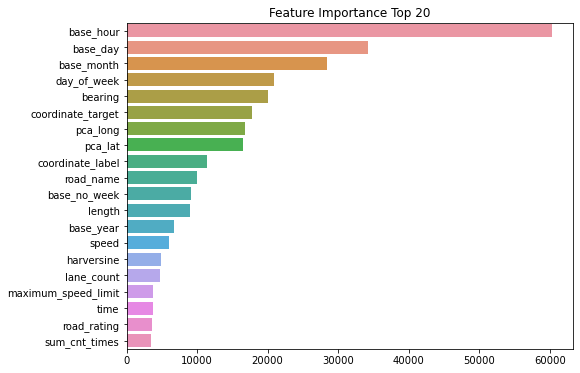

In [9]:
ft_importance_values = lgbm_reg.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

### Make Submission File

In [10]:
sample = pd.read_csv('../data/raw/sample_submission.csv')
sample['target'] = lgbm_reg.predict(X_test)
display(sample)

,id,target
0,TEST_000000,24.504785
1,TEST_000001,43.773541
2,TEST_000002,65.248069
3,TEST_000003,37.743634
4,TEST_000004,44.536591
...,...,...
291236,TEST_291236,47.480208
291237,TEST_291237,51.480622
291238,TEST_291238,23.239317
291239,TEST_291239,23.737282


In [11]:
date = str(pd.Timestamp.now())[:10].replace('-','')
sample.to_csv(f'../data/submission/{date}.csv', index=False)